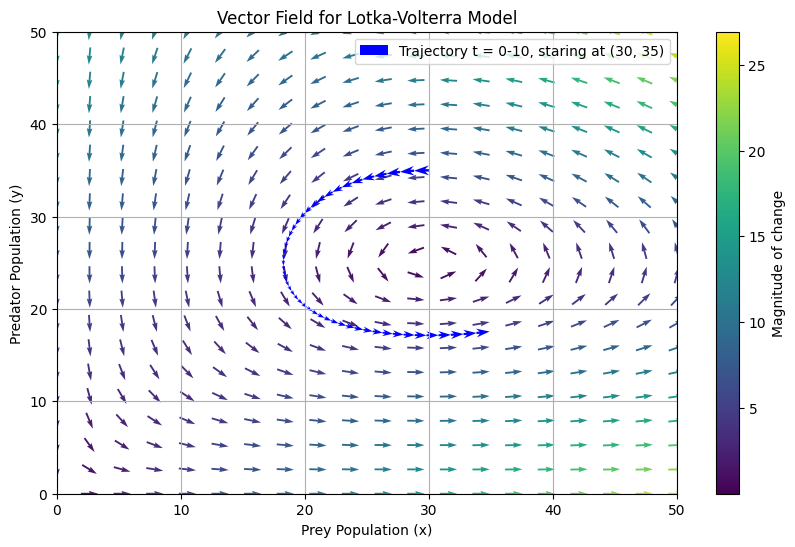

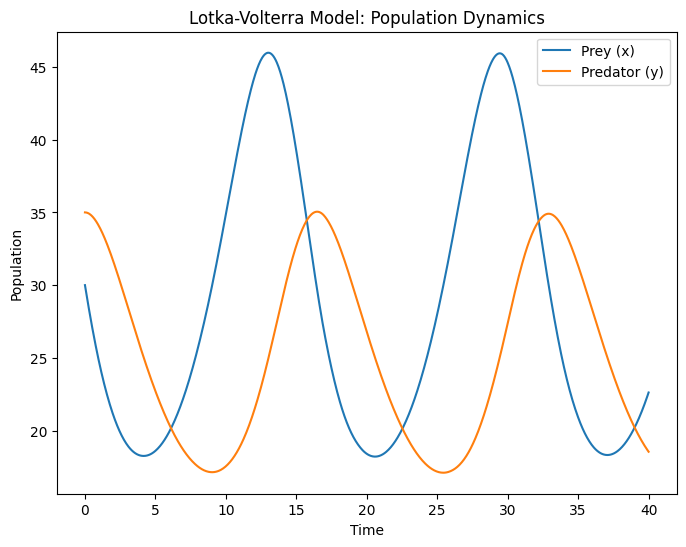

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### PARAMETERS

# Parameters for the Lotka-Volterra model
alpha = 0.5  # Prey growth rate
beta = 0.02  # Predation rate
gamma = 0.3  # Predator death rate
delta = 0.01 # Predator reproduction rate

# Define the Lotka-Volterra equations
def lotka_volterra(x, y):
    dx = alpha * x - beta * x * y
    dy = delta * x * y - gamma * y
    return dx, dy

def lotka_volterra_system(t, z):
    x, y = z
    return lotka_volterra(x, y)

### TRAJECTORY

# Initial conditions and time span to solve for the x(t) & y(t)
z0 = [30, 35]  # Initial populations: [prey, predator]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 50)  # Time evaluation points

# Solve the ODE to get the trajectory
solution = solve_ivp(lotka_volterra_system, t_span, z0, t_eval=t_eval)
x_traj = solution.y[0]  # Prey population
y_traj = solution.y[1]  # Predator population

### VECTOR FIELD

# Create a grid of (x, y) points
x = np.linspace(0, 50, 20)  # Range: Creates 20 points between 0 and 50 for prey
y = np.linspace(0, 50, 20)  # Range: Creates 20 points between 0 and 50 for predators
X, Y = np.meshgrid(x, y)

# Compute the derivatives at each grid point
DX, DY = lotka_volterra(X, Y)

# Normalize the vectors for better visualization
magnitude = np.sqrt(DX**2 + DY**2)
epsilon = 1e-8  # A small positive value to prevent division by zero
magnitude = np.where(magnitude == 0, epsilon, magnitude)
DX /= magnitude
DY /= magnitude
DX = np.nan_to_num(DX, nan=1) # Replace NaN with 1
DY = np.nan_to_num(DY, nan=1) # Replace NaN with 1

# Plot the vector field
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, DX, DY, magnitude, pivot="mid", cmap="viridis")
plt.colorbar(label="Magnitude of change")

# Plot the trajectory as a curved arrow
plt.quiver(x_traj[:-1], y_traj[:-1], np.diff(x_traj), np.diff(y_traj),
           angles='xy', scale_units='xy', scale=1, color='b',
           width=0.005, headwidth=4, headlength=6, label='Trajectory t = 0-10, staring at (30, 35)')


plt.title("Vector Field for Lotka-Volterra Model")
plt.xlabel("Prey Population (x)")
plt.ylabel("Predator Population (y)")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid()
plt.legend()
plt.show()

# Another plot for population dynamics

# Initial conditions and time span
z0 = [30, 35]  # Initial populations: [prey, predator]
t_span = (0, 40)
t_eval = np.linspace(*t_span, 1000)

# Solve the system
solution = solve_ivp(lotka_volterra_system, t_span, z0, t_eval=t_eval)  # Using lotka_volterra_system

# Create a new figure for the population dynamics plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot the solution
plt.plot(solution.t, solution.y[0], label='Prey (x)')
plt.plot(solution.t, solution.y[1], label='Predator (y)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Lotka-Volterra Model: Population Dynamics')
plt.show()

